# Think Stats: Metis Prework
>**Stephanie Zambito 1-6-19**
---
### Chapter 2 Exercise 4 (Cohen's d)
>Investigate whether first babies are lighter or heavier than others using Cohen's d to quanitfy the difference.

In [25]:
import numpy as np
import matplotlib as plt
%matplotlib inline

import nsfg
import first
import thinkstats2
import thinkplot

In [8]:
#Load the pregnancy data and select records for live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [11]:
#From live births, select first babies and others using birthord
firsts = live[live.birthord==  1]
others = live[live.birthord != 1]

In [12]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [14]:
#Calculate Cohen effect size (difference in means expressed by std dev)
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1,n2 = len(group1), len(group2)
    
    pooled_var = (n1*var1 + n2*var2) / (n1+n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [15]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.08867292707260174

### Chapter 3 Exercise 1 (Actual vs. Biased)
>Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households. Next, compute the biased distribution if we surveyed the children and asked them. Plot the actual and biased distributions and compute their means.

In [18]:
resp = nsfg.ReadFemResp()

In [23]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

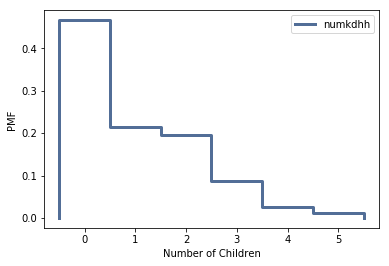

In [26]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of Children', ylabel='PMF')

In [35]:
# Computes the biased PMF
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x,x)
    new_pmf.Normalize()
    return new_pmf

In [36]:
biased = BiasPmf(pmf, label='biased')

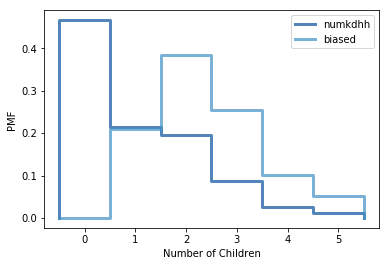

In [37]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of Children', ylabel='PMF')

In [38]:
pmf.Mean()

1.024205155043831

In [39]:
biased.Mean()

2.403679100664282

### Chapter 4 Exercise 2 (Random Distribution)
>The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability. Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [40]:
t = np.random.random(1000)

No handles with labels found to put in legend.


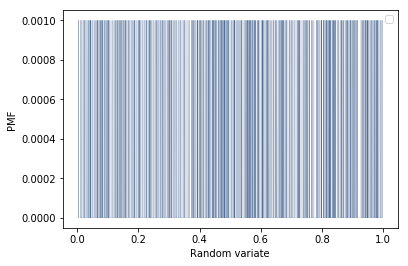

In [41]:
pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

No handles with labels found to put in legend.


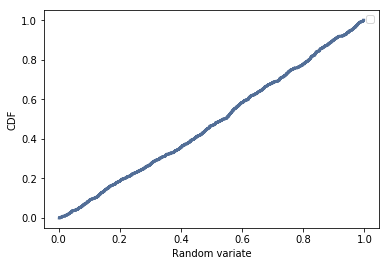

In [42]:
cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')

### Chapter 5 Exercise 1 (Blue Men)
>In the Behavioral Risk Factor Surveillance System (BRFSS), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and 6’1”. What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [43]:
import scipy.stats

In [50]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma) # normal distribution
type(dist) # a frozen random variable can compute its mean and std dev

scipy.stats._distn_infrastructure.rv_frozen

In [47]:
dist.mean(), dist.std()

(178.0, 7.7)

In [49]:
#Considers how many people are more than 1 std dev below the mean
dist.cdf(mu-sigma)

0.1586552539314574

In [51]:
#Considers how many people are between 5'10" and 6'1"
low  = dist.cdf(177.8) # 5'10"
high = dist.cdf(185.4) # 6'1"
low, high, high-low

(0.48963902786483265, 0.8317337108107857, 0.3420946829459531)

### Bayesian (Elvis Presley Twin)
>Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.

In [54]:
total_births = 3000
prob_identical_twin = 1/300
prob_fraternal_twin = 1/125

In [69]:
identical_twins = int(total_births*prob_identical_twin)
#boy-boy <--- only set we care about
#boy-girl
identical_boy_twins = int(identical_twins/2)
print(identical_boy_twins)

5


In [70]:
fraternal_twins = int(total_births*prob_fraternal_twin)
#boy-boy <--- only set we care about
#boy-girl
#girl-boy
#girl-girl
fraternal_boy_twins = int(fraternal_twins/4)
print(fraternal_boy_twins)

6


In [72]:
prob_identical_boy_twins = identical_boy_twins / (identical_boy_twins + fraternal_boy_twins)
print(prob_identical_boy_twins)

0.45454545454545453
